Consignas para la pre-entrega: Entregar una notebook con el código funcionando que incluya: 1- introducción (hablar del dataset, la fuente, darle contexto o información adicional, cualquier tema relevante que se encuentre relacionado), 2- Objetivo del proyecto (que buscan lograr con el trabajo, principalmente definir si van a aplicar clustering, clasificación o regresión junto a las hipótesis correspondientes), 3- contexto comercial (porque es importante el análisis, salvar vidas? mejorar algo? negocios? ganar dinero? desarrollarlo bien) y luego 4- EDA (carga, limpieza y manipulación de datos), junto a 4 o 5 visualizaciones como mínimo incluyendo boxplot, dispersión, histograma y correlación. Sumar explicaciones de lo que van haciendo y conclusiones.

# **Introducción al Dataset - Base Ficticia de Transacciones de Tarjetas de Crédito y Débito**

El presente dataset está compuesto por una serie de transacciones realizadas con tarjetas de crédito y débito. Se trata de un conjunto de datos ficticio, a fin de asegurar que no se comprometan datos sensibles. En la misma se verá reflejada toda la información asociada a un grupo de transacciones realizadas con los distintos medios de pago mencionados.

# **Objetivo**

El presente trabajo tiene como objetivo trabajar la información que se encuentra almacenada en el dataset para poder a partir de ella entender distintas cuestiones como, por ejemplo, conocer el comportamiento de los usuarios, cómo usan sus tarjetas, en que tipo de comercios operan, bajo que modalidad de pago (cuotas/contado), etc.

# **Importación de datos y primeras observaciones**


In [842]:
#Importación del dataset

#Se dejan en el script dos instancias de importación

#A)Importación directa desde Google Drive (La intención de esta importación comentada es para poder vincular rádidamente el dataset en función de que hubiera que realizar
#modificaciones y de esta forma temporalmente evitar recurrentes subidas a GitHub. En la entrega final estas lineas quedarán comentadas ya que se dejará disponible
#la importación directamente desde GitHub)

#import pandas as pd
#from google.colab import drive
#import os

#drive.mount('/content/gdrive')
#%cd '/content/gdrive/MyDrive/CoderHouse/Data Science 01/Proyecto Final'

#Hacemos lectura del dataset DF(Dataframe)_TRX(Transacciones)

#df_trx = pd.read_csv('trx_tc_dataset.csv', sep = ";")

#B)Las siguientes lineas serán las que definitivamente importen el dataset desde GitHub

df_trx = pd.read_csv('https://raw.githubusercontent.com/estebanbec/data_science_coder/main/trx_tc_dataset.csv', sep = ";")

A fin de validar la correcta importación del file, y proceder en conocerlo, podemos ejecutar algunas funciones

In [843]:
#A)Head
df_trx.head()

,ID_TRX,ID_Banco,ID_Marca_Tarjeta,ID_Categoria,Importe_Operacion,Moneda,Cantidad_Cuotas,Fecha_Operacion,Número de tarjeta,Modalidad,Fecha_Presentación_Cupón,Rubro_Establecimiento,Provincia_Consumidor,Provincia_Comercio,Observada_BCRA,Sexo,Ingresos_Usuario,Edad
0,1,Galicia,Visa,Nacional,168354,Pesos,1,21/1/2022,"6,79072E+15",Presencial,25/1/2022,Bares,Córdoba,Neuquén,0.0,Masculino,482091,19
1,2,Macro,Visa,Internacional,971309,Pesos,1,29/11/2022,"5,39871E+15",Venta Teléfonica,3/12/2022,Cervecerías artesanales,Jujuy,La Pampa,NaN,Masculino,534450,21
2,3,Santander,Visa,Platinum,143772,Pesos,1,11/8/2022,"4,16545E+15",Débito Automático,18/8/2022,Casas de comidas,Buenos Aires,Catamarca,1.0,Masculino,270203,20
3,4,Credicoop,Visa,Platinum,382229,Pesos,1,6/2/2022,"4,23443E+15",E Commerce,10/2/2022,Rotiserías,La Rioja,Jujuy,0.0,Masculino,250225,23
4,5,Supervielle,Visa,Signature Black,373381,Pesos,1,25/8/2022,"6,69803E+15",MODO,31/8/2022,Casas de comida por peso,Mendoza,Buenos Aires,0.0,Masculino,347927,18


In [844]:
#B)Tail
df_trx.tail()

,ID_TRX,ID_Banco,ID_Marca_Tarjeta,ID_Categoria,Importe_Operacion,Moneda,Cantidad_Cuotas,Fecha_Operacion,Número de tarjeta,Modalidad,Fecha_Presentación_Cupón,Rubro_Establecimiento,Provincia_Consumidor,Provincia_Comercio,Observada_BCRA,Sexo,Ingresos_Usuario,Edad
1995,1996,Credicoop,American Express,Nacional,310459,Pesos,12,16/1/2022,"4,32759E+15",Presencial,21/1/2022,Empresas de fumigación / desinfección,La Rioja,Chaco,0.0,Masculino,556939,76
1996,1997,Supervielle,American Express,Internacional,362935,Pesos,3,25/5/2022,"6,90208E+15",Venta Teléfonica,30/5/2022,Empresas de limpieza de tanques,Santiago del Estero,Río Negro,0.0,Femenino,779853,70
1997,1998,HSBC,American Express,Gold,484586,Pesos,3,15/4/2022,"6,58574E+15",Débito Automático,20/4/2022,Empresas de mantenimiento y reparación de edif...,La Rioja,Mendoza,0.0,Masculino,592661,75
1998,1999,Itaú,American Express,Platinum,212318,Pesos,1,14/8/2022,"5,09671E+15",E Commerce,21/8/2022,Empresas de construcción,CABA,CABA,0.0,Masculino,277951,73
1999,2000,Columbia,American Express,Signature Black,610185,Pesos,1,5/6/2022,"4,43653E+15",MODO,11/6/2022,Venta de indumentaria y accesorios,Formosa,Misiones,0.0,Femenino,320119,77


In [845]:
#C)Columnas
df_trx.columns

Index(['ID_TRX', 'ID_Banco', 'ID_Marca_Tarjeta', 'ID_Categoria',
       'Importe_Operacion', 'Moneda', 'Cantidad_Cuotas', 'Fecha_Operacion',
       'Número de tarjeta', 'Modalidad', 'Fecha_Presentación_Cupón',
       'Rubro_Establecimiento', 'Provincia_Consumidor', 'Provincia_Comercio',
       'Observada_BCRA', 'Sexo', 'Ingresos_Usuario', 'Edad'],
      dtype='object')

Las columnas contienen cada una de ellas la siguiente información:

1. ID_TRX = Número de identificación de la transacción
2. ID_Banco = Identificación del banco emisor de la tarjeta
3. ID_Marca_Tarjeta = Que marca es la tarjeta de crédito/débito
4. ID_Categoría = Cuál es la categoría de la tarjeta (Gold, Black, etc.)
5. Importe_Operacion = Suma de la operación realizada
6. Moneda = Moneda con que se cursó (Dólares, pesos, etc.)
7.Cantidad_Cuotas = Plazo de pago elegido por el usuario
8.Fecha_Operacion = Fecha en que se realizó la compra
9.Númerodetarjeta = Número de tarjeta involucrada
10.Modalidad = Forma en que realizó la compra (Presencial, E Commerce, etc)
11.Fecha_Presentación_Cupón = Fecha en que se presentó el cupón (puede ser igual o posterior a la fecha de compra)
12.Rubro_Establecimiento = Rubro que tiene asignado el establecimiento vendedor
13.Provincia_Consumidor = Provincia de donde es originario el consumidor
14.Provincia_Comercio = Provincia donde esta radicado el comercio
15.Observada_BCRA = Indica si la transacción es observada por el BCRA (Considerada fraudulenta) - 0 Implica que no está observada y 1 que está observada
16.Sexo del usuario
17.Ingresos del usuario
18.Edad del usuario

Podemos conocer además la estructura y algunos datos principales del dataset con la función Shape, Describe e identificar además la aparición de valores nulos.

In [846]:
df_trx.shape

(2000, 18)

Puede apreciarse que se trata de un dataset compuesto por 2000 filas y 18 columas.

In [847]:
df_trx.describe()

,ID_TRX,Importe_Operacion,Cantidad_Cuotas,Observada_BCRA,Ingresos_Usuario,Edad
count,2000.000000,2.000000e+03,2000.000000,1994.000000,2000.00000,2000.000000
mean,1000.500000,4.960173e+05,4.337500,0.091274,489144.30500,47.159500
std,577.494589,2.992233e+05,3.912703,0.288070,240013.97387,16.833917
min,1.000000,1.729000e+03,1.000000,0.000000,75107.00000,18.000000
25%,500.750000,2.440990e+05,1.000000,0.000000,280940.00000,32.000000
50%,1000.500000,4.894545e+05,3.000000,0.000000,489477.00000,47.000000
75%,1500.250000,7.528375e+05,6.000000,0.000000,699474.25000,62.000000
max,2000.000000,2.500000e+06,12.000000,1.000000,899873.00000,78.000000


De este "DESCRIBE" rapidamente podemos identificar que hay columnas que no tienen todos los datos para cada registro. Por ejemplo, en la columna "Observada_BCRA" encontramos que del total de 2000 filas, solo 1994 contienen información, y habría 6 registros que estarían vacíos.

Para poder profundizar sobre dicho hallazgo, utilizaremos la función "isna"

In [848]:
#Primero aplicamos la función al dataframe para que a nivel de detalle revise en cada columna la existencia de valores nulos:
print(df_trx.isnull().sum())

ID_TRX                      0
ID_Banco                    0
ID_Marca_Tarjeta            0
ID_Categoria                0
Importe_Operacion           0
Moneda                      0
Cantidad_Cuotas             0
Fecha_Operacion             0
Número de tarjeta           0
Modalidad                   0
Fecha_Presentación_Cupón    0
Rubro_Establecimiento       0
Provincia_Consumidor        0
Provincia_Comercio          0
Observada_BCRA              6
Sexo                        0
Ingresos_Usuario            0
Edad                        0
dtype: int64


Sumado a ello, rapidamente podemos pedirle que nos indique cuáles son las columnas que podrían involucrar valores nulos y cuántos son:

In [849]:
#Teniendo en cuenta que:
#1. La cantidad de registros sin información, respecto del total, representa solo el 0.3% de la información ( 6 registros / 2000 totales)
#2. Que las operaciones fueron cursadas (es decir, existen)
#3. Que el hecho que esté observada por BCRA, o no, no es determinante en el perfeccionamiento de la misma (sino que es un dato calificativo de ella)
#Se presentan 2 alternativas:
    #A)Desestimar los registros
    #B)Asumir que no fueron observadas por el BCRA
#En el presente trabajo optaremos por la segunda opción a fin de no perder el resto de la información de estas 6 transacciones.
#Para ello reemplazaremos los valores nulos con un 0 (cero) indicando que no fueron observadas por el BCRA

In [850]:
df_trx['Observada_BCRA'] = df_trx['Observada_BCRA'].fillna(0)

In [851]:
#Volvemos a imprimir el recuento de nulos para verificar que se haya aplicado correctamente la función FILLNA
print(df_trx.isnull().sum())

ID_TRX                      0
ID_Banco                    0
ID_Marca_Tarjeta            0
ID_Categoria                0
Importe_Operacion           0
Moneda                      0
Cantidad_Cuotas             0
Fecha_Operacion             0
Número de tarjeta           0
Modalidad                   0
Fecha_Presentación_Cupón    0
Rubro_Establecimiento       0
Provincia_Consumidor        0
Provincia_Comercio          0
Observada_BCRA              0
Sexo                        0
Ingresos_Usuario            0
Edad                        0
dtype: int64


Para continuar con el análisis del dataset habiendo ya relevado posibles factores que afecten la información provista (como los datos ausentes), avanzaremos con la generación de gráficos.

Ante todo, vamos a importar las librerías necesarias para ya tenerlas cargadas y avanzar en la confección de los gráficos:

In [852]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Primer Gráfico - Pie del Share de Tarjetas

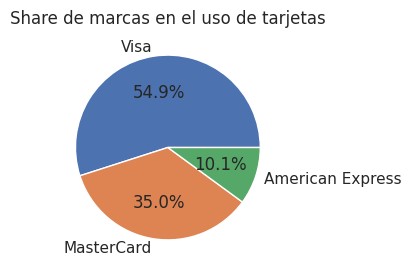

In [853]:
#En el primer gráfico vamos a mostrar en un pie cuál es el share de las distintas marcas de tarjetas involucradas en la base

#Primero vamos a conocer cuantas veces aparece cada marca:

#marcas = ['Visa','MasterCard','American Express']

fig, ax = plt.subplots(figsize = (7,3))

ax.pie(df_trx['ID_Marca_Tarjeta'].value_counts(), labels = df_trx['ID_Marca_Tarjeta'].unique() ,autopct='%1.1f%%')

ax.set_title('Share de marcas en el uso de tarjetas') #para titular el gráfico

plt.show()

#Explicación del código

#ax.pie() = Función de la librería que dibuja pie chart

#El primer argumento "df_trx['ID_Marca_Tarjeta'].value_counts()" nos permite conocer la cantidad de veces que existe cada marca en el dataframe y es
#lo que queremos reflejar en el pie chart

#El segundo argumento son las etiquetas para los datos, que se corresponden a identificar los valores que pueden aparecer
#en la columna ID_Marca_Tarjeta del dataframe --> labels = df_trx['ID_Marca_Tarjeta'].unique()

#A fin de asignar valores porcentuales en el pie, aplicamos la funcionalidad autopct='%1.1f%%'

#plt.show() para evitar que aparezca todo el código

Del primer gráfico podemos interpretar que claramente Visa es la marca de tarjetas que más operaciones tiene llevadas a cabo, seguidas por MasterCard y American Express.
A modo de ejemplo, esta información puede servir para que por ejemplo si una entidad quisiera promover alguna de las marcas puntuales, conocer su status inicial de share, proponer un objetivo a alcanzar, y medir en el tiempo su cumplimiento

Otro gráfico que nos permitirá seguir avanzando en la comprensión de nuestra base es la edad de los usuarios.
Esto permitirá en función de la distribución que exista, saber hacia donde orientar las acciones comerciales que decida la entidad.

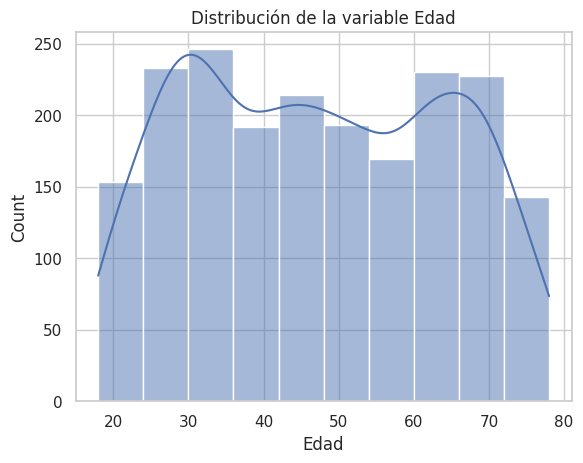

In [854]:
#En primer lugar vamos a entender la distribución de edades sin otras consideraciones
fig = plt.figure()
ax = plt.axes()
ax = sns.histplot(x=df_trx.Edad, kde=True, linewidth=1, bins = 10)
ax.set_title("Distribución de la variable Edad")
plt.show()

De la apreciación del gráfico pueden obtenerse varias conclusiones
A)La distribución no representa una asimetría específica ni a la derecha ni a la izquierda, como así tampoco una distribución simétrica. Tiene más bien una distribución que en ciertos tramos de edades parecería tender a uniforme.
B)Que la mayor cantidad de usuarios de tarjetas están comprendidos entre los adultos que tienen entre 25 y 75 años. Esto tiene sentido ya que los jovenes en sus edades tempranas todavía están consolidandosé en lo que respecta a ingresos/gastos (por lo que usan poco) y los adultos mayores hacen muy poco uso de estas herramientas de pago.

In [855]:
#En el segundo gráfico vamos a mostrar con lineas la evolución en terminos de volúmen de transacciones realizadas a lo largo
#del año bajo análisis, aperturado por mes.

#Para ello primero debo extraer los meses desde la columna fecha de operación, convirtiendolá a tipo de datos fecha

# Convertir la columna 'Fecha_Operacion' al tipo de dato datetime

df_trx['Fecha_Operacion'] = pd.to_datetime(df_trx['Fecha_Operacion'], dayfirst = True)

In [856]:
#Luego obtengo de cada registro, el mes que corresponde

x = df_trx['Fecha_Operacion'].dt.month.unique()

x.sort()

print(x)

#Ya tengo identificado a partir de la columna "Fecha de Operación" donde está la fecha completa en formato dd/mm/aaaa cuales son los meses
#a tener en cuenta (podría haber armado manualmente una lista que contenga el rango de 1 a 12 pero quería poder trabajar a partir de la info
#provista en la base y no generar manualmente datos adicionales

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [857]:
y = df_trx['Fecha_Operacion'].dt.month.value_counts().sort_index()
print(y)

1     190
2     143
3     175
4     162
5     162
6     168
7     159
8     185
9     164
10    162
11    169
12    161
Name: Fecha_Operacion, dtype: int64


In [858]:
#Ya tengo en mi variable X los meses
#Y en mi variable Y la cantidad de registros para cada uno de los meses
#Ahora a dibujar...

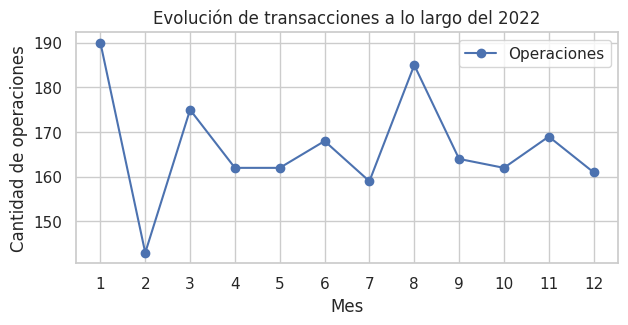

In [859]:
fig, ax = plt.subplots(figsize = (7,3))

ax.plot(x, y, label='Operaciones', marker='o') #dibuja la linea

ax.set_xlabel('Mes') #es el nombre del eje x

ax.set_ylabel('Cantidad de operaciones') # es el nombre del eje y

ax.set_title('Evolución de transacciones a lo largo del 2022') #es el titulo de la figura

ax.set_xticks(x) #Esta línea la agregué porque de modo contrario se graficaban los meses de 2 en 2 y quería que aparecieran todos.

ax.legend()

A priori, podemos suponer que durante el primer mes del año, debido a un efecto estacional asociado a las vacaciones, la cantidad de transacciones es mayor, teniendo una reducción en el mes siguiente, y manteniendose relativamente estable a lo largo del resto del año.

In [860]:
#Para este tercer gráfico vamos a dibujar en un barchart la cantidad de operaciones que se pueden apreciar en la base
#aperturadas para según la cantidad de cuotas en que pagó cada uno de los clientes al momento de llevar adelante la operación

In [861]:
#Primero debo asignar a los valores que aparecerán en el eje de las X el número de cuotas en que pudieron haber operado
Plazos_Cuotas = df_trx['Cantidad_Cuotas'].unique()

Plazos_Cuotas.sort()

print(Plazos_Cuotas)

#Puedo apreciar que los clientes pagan entre 1 y 12 cuotas cuando utilizan la tarjeta.

[ 1  3  6 12]


In [862]:
#Ahora necesito entender que cantidad de operaciones se dan en cada plazo para poder amar el eje de las y

Cantidad_Operaciones_Por_Plazo = df_trx['Cantidad_Cuotas'].value_counts().sort_index()

print(Cantidad_Operaciones_Por_Plazo)

1     758
3     533
6     365
12    344
Name: Cantidad_Cuotas, dtype: int64


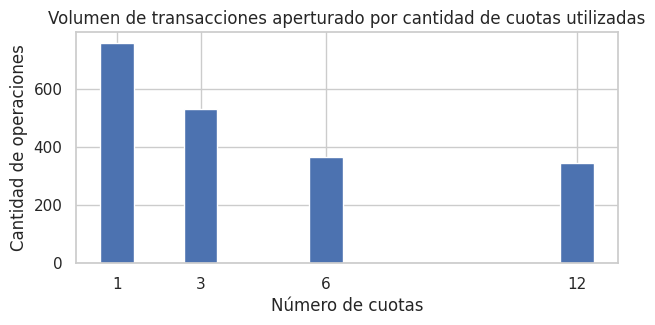

In [863]:
#Teniendo armada la información a contemplar para cada eje, graficamos:
fig, ax = plt.subplots(figsize=(7,3))

ax.bar(Plazos_Cuotas, Cantidad_Operaciones_Por_Plazo)

ax.set_title('Volumen de transacciones aperturado por cantidad de cuotas utilizadas') # titulo

ax.set_xlabel('Número de cuotas') # etiqueta de eje x

ax.set_ylabel('Cantidad de operaciones')

ax.set_xticks(Plazos_Cuotas)

plt.show()

###AYUDA: Sobre este gráfico no puedo dilucidar el motivo por el cual las barras no están distribuidas equitativamente a lo
#ancho del gráfico, apareciendo los valores de 6 y 12 muy distanciados.
#Busqué en la documentación y no encontré ningún argumento/parámetro que me pudiera ayudar a corregirlo.

In [864]:
#Vamos a utilizar la funcionalidad hue de Seaborn para poder mostrar dentro de cada marca, como se aperturan las categorías
#de los productos utilizados en función de la cantidad de operaciones realizadas.

<ipython-input-865-3c9be9d2970b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<Figure size 1200x800 with 0 Axes>

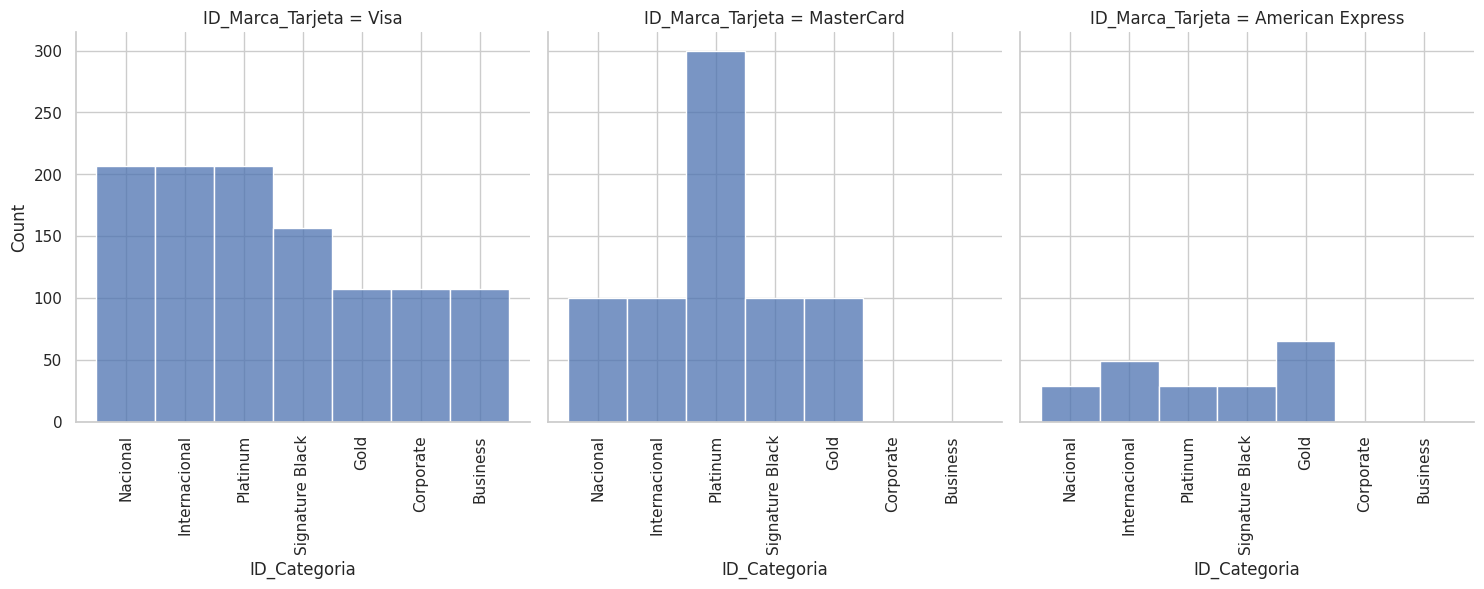

In [865]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

grid = sns.displot(data=df_trx, x='ID_Categoria', col='ID_Marca_Tarjeta')

# Visto que de graficar únicamente, las etiquetas del eje X se superponen en función de su longitud, vamos a rotarlas 90 grados
for ax in grid.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Mostrar el gráfico
plt.show()

Se puede observar entonces que, por ejemplo, ni American Express ni MasterCard tienen tarjetas Corporativas (Corporate/Business). Esto en parte puede explicar cuando vimos el share, el motivo por el cual Visa tiene más parque de tarjetas ya que ofrece mayor cantidad de productos a los usuarios acorde a sus necesidades.

In [866]:
#Este gráfico nos permitirá entender la relación entre la provincia donde reside el consumidor, y la provincia donde
#se encuentra el comercio.

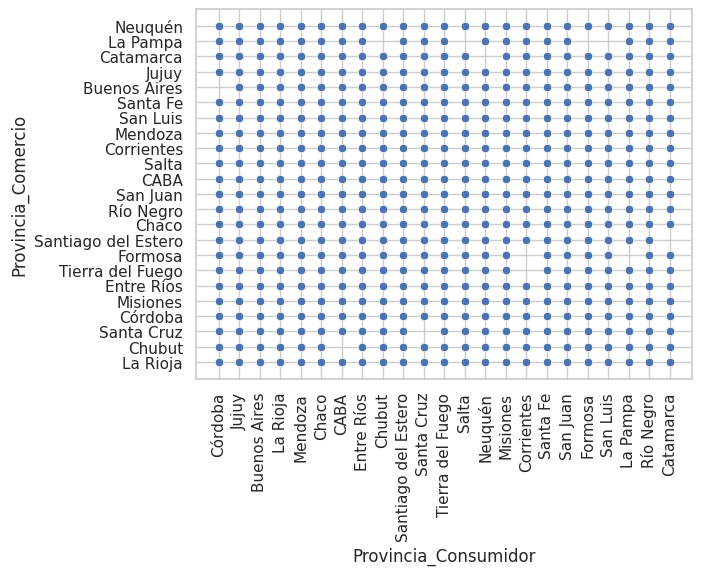

In [867]:
sns.scatterplot(data= df_trx, x = 'Provincia_Consumidor', y = 'Provincia_Comercio')

plt.xticks(rotation=90) #debido a la longitud de caracteres, lo rotamos a 90° para que pueda ser legible

plt.show()

#Se puede observar que, a excepción de pocos casos, generalmente los usuarios de todas las provincias han operado en comercios de todo el país.
#Existen algunos casos como el de Córdoba/Buenos Aires donde ningún usuario de la primera provincia mencionada ha operado en la segunda respectivamente.

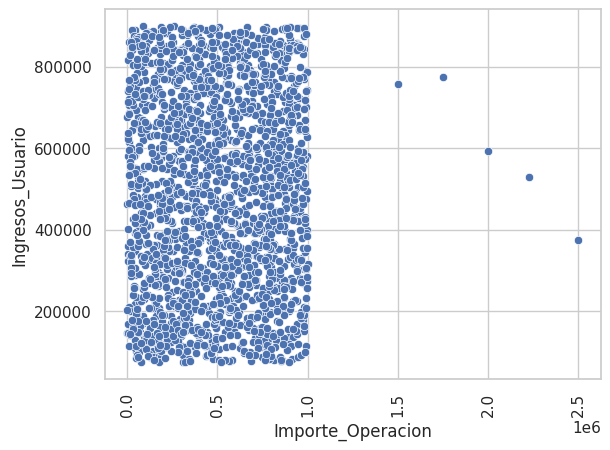

In [868]:
#Relación Importes Operados/Ingresos
sns.scatterplot(data= df_trx, x = 'Importe_Operacion', y = 'Ingresos_Usuario')

plt.xticks(rotation=90) #debido a la longitud de caracteres, lo rotamos a 90° para que pueda ser legible

plt.show()


De este diagrama de dispersión puede observarse que no existe una correlación entre lo que los usuarios gastan y sus ingresos, sino que hay gran dispersión.
Podría suponerse que, en terminos generales, quienes más gastan con tarjeta son quienes más ganan, pero este gráfico nos muestra que no podríamos afirmar dicha teoría.

Boxplot para entender los gastos en función del sexo de los usuarios:

Text(0, 0.5, 'Importes Operados')

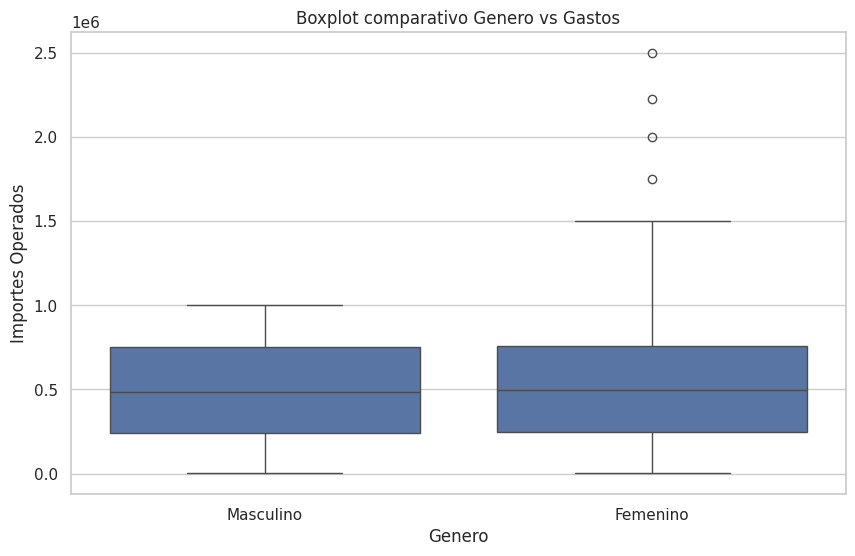

In [869]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_trx.Sexo, y= df_trx.Importe_Operacion)
plt.title('Boxplot comparativo Genero vs Gastos')
plt.xlabel('Genero')
plt.ylabel('Importes Operados')

Se puede observar que para el genero femenino existen algunos pocos casos atípicos (outliers), mientras que para el genero masculino no habría transacciones que respondan de esta manera.
Para el caso del genero femenino, habrá que entender cuáles/cuantos son los outliers para definir su tratamiento.